<a href="https://colab.research.google.com/github/eyaGONGI/Codersquare/blob/main/Copie_de_Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/sales_predictions_2023.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


How many rows and columns?

In [ ]:
df.shape

(8523, 12)

What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 Are there duplicates? If so, drop any duplicates

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

Identify missing values

In [ ]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Decide on how to address the missing values and do it!

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(int(df['Item_Weight'].mean()))

Filling 'Item_Weight' missing values with mean because items have probably the same weight range.

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filling 'Outlet_Size' missing values with the most frequent value because outlets have same sizes most of the time.

In [ ]:
df['Outlet_Size'].value_counts(dropna=True)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

No missing values

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [ ]:
df['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
df['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts(dropna=True)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts(dropna=True)

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts(dropna=True)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

the summary statistics of each (min, max, mean)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

item weight statistics

In [ ]:
min_item_weight=df['Item_Weight'].min()
max_item_weight=df['Item_Weight'].max()
avg_item_weight=df['Item_Weight'].mean()
print('minimum of items weight',min_item_weight)
print('maximum of items weight',max_item_weight)
print('average of items weight',avg_item_weight)

minimum of items weight 4.555
maximum of items weight 21.35
average of items weight 12.710427666314677


In [ ]:
min_item_Visibility=df['Item_Visibility'].min()
max_item_Visibility=df['Item_Visibility'].max()
avg_item_Visibility=df['Item_Visibility'].mean()
print('minimum of items Visibility',min_item_Visibility)
print('maximum of items Visibility',max_item_Visibility)
print('average of items Visibility',avg_item_Visibility)

minimum of items Visibility 0.0
maximum of items Visibility 0.328390948
average of items Visibility 0.06613202877895108


In [ ]:
min_item_MRP=df['Item_MRP'].min()
max_item_MRP=df['Item_MRP'].max()
avg_item_MRP=df['Item_MRP'].mean()
print('minimum of items MRP',min_item_MRP)
print('maximum of items MRP',max_item_MRP)
print('average of items MRP',avg_item_MRP)

minimum of items MRP 31.29
maximum of items MRP 266.8884
average of items MRP 140.9927819781767


In [ ]:
min_item_Outlet_Sales=df['Item_Outlet_Sales'].min()
max_item_Outlet_Sales=df['Item_Outlet_Sales'].max()
avg_item_Outlet_Sales=df['Item_Outlet_Sales'].mean()
print('minimum of items MRP',min_item_Outlet_Sales)
print('maximum of items MRP',max_item_Outlet_Sales)
print('average of items MRP',avg_item_Outlet_Sales)

minimum of items MRP 33.29
maximum of items MRP 13086.9648
average of items MRP 2181.288913575032


# Histogram

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

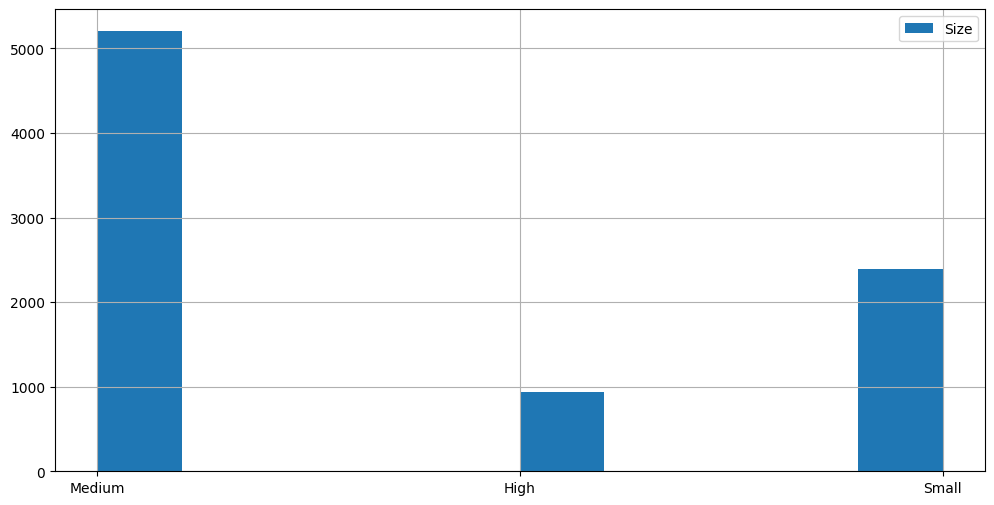

In [59]:
import matplotlib.pyplot as plt
df['Outlet_Size'].hist(figsize=(12,6))
plt.legend(('Size',' '),fontsize = "10",loc='upper right')
plt.show()

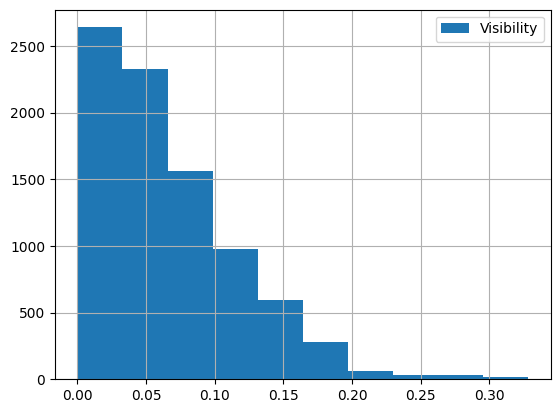

In [57]:
df['Item_Visibility'].hist()
plt.legend(('Visibility',' '),fontsize = "10",loc='upper right')
plt.show()

# Boxplot

[Text(1, 0, 'Sales')]

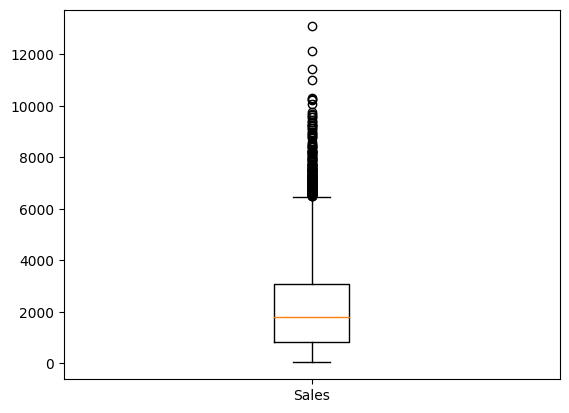

In [53]:
mydict={'Sales': df['Item_Outlet_Sales']}
fig, ax = plt.subplots()
ax.boxplot(mydict.values())
ax.set_xticklabels(mydict.keys())

# Heatmap

In [54]:
corr=df.corr()

<ipython-input-54-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

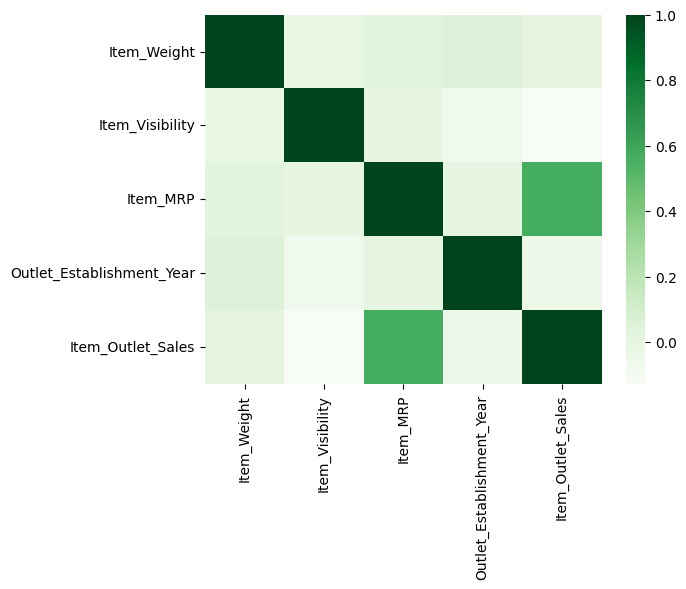

In [55]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens')

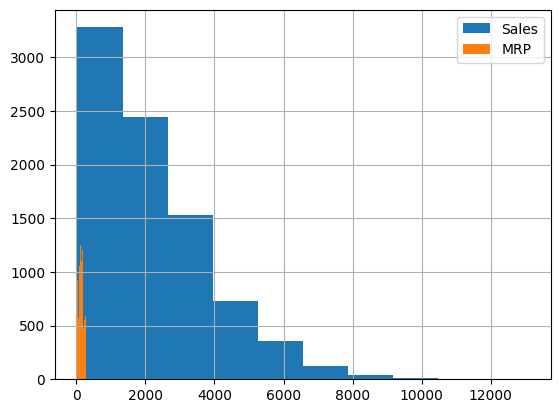

In [56]:
df['Item_Outlet_Sales'].hist()
df['Item_MRP'].hist()
plt.legend(('Sales','MRP'),fontsize = "10",loc='upper right')
plt.show()